In [84]:
%matplotlib inline
import sys
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [85]:
def jsonload(fn):
    with open(fn, "r") as fp:
        d = json.load(fp)
    return d

def npize(array):
    return array[:,0], array[:,1], array[:,2], array[:,3], array[:,4]

In [86]:
data = []
depths = [2,5,10,20,50,100]
for depth in depths:
    v = jsonload("results/vanilla-mnist-%d.json" % (depth))
    h = jsonload("results/highway-mnist-%d.json" % (depth))
    assert(len(v) == len(h))
    data.append((depth,np.array(v),np.array(h)))

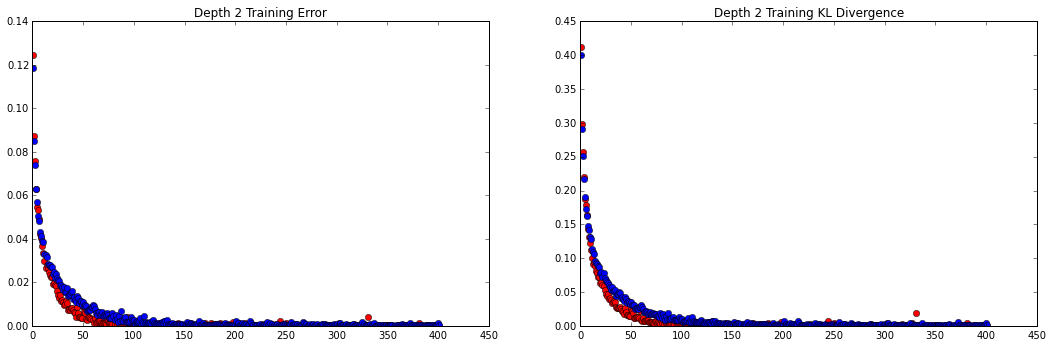

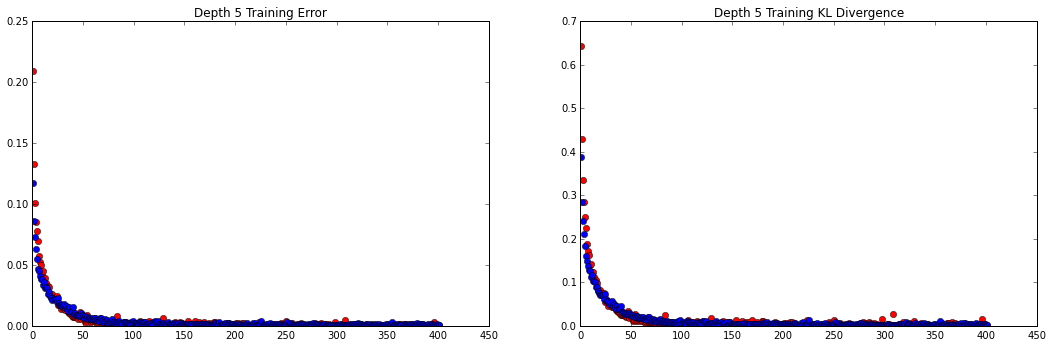

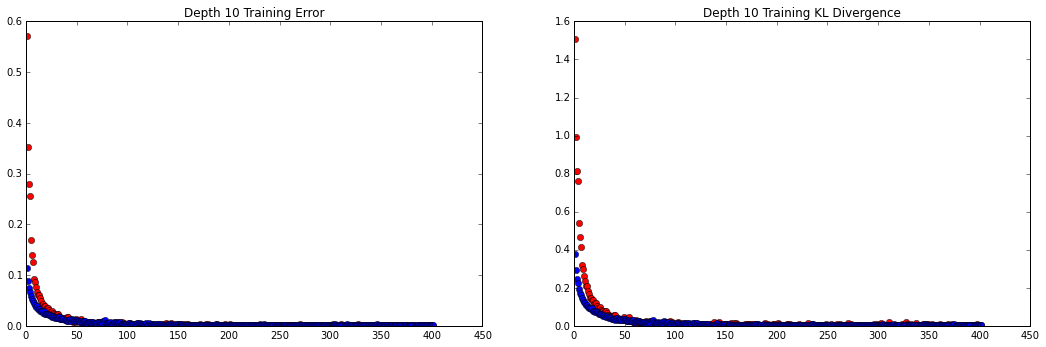

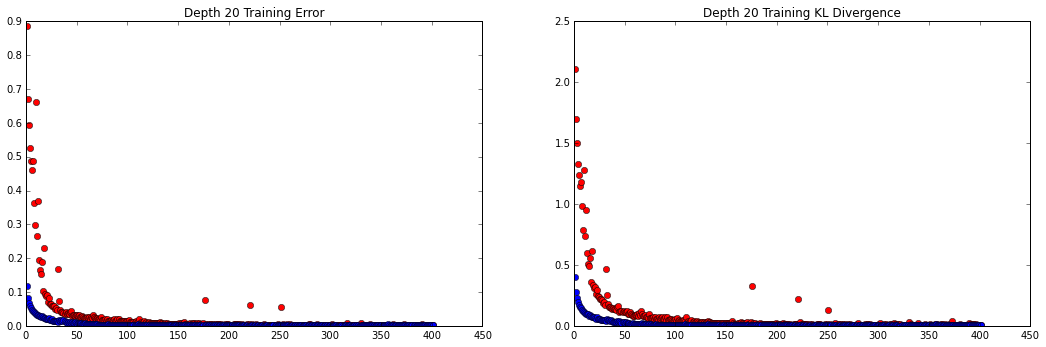

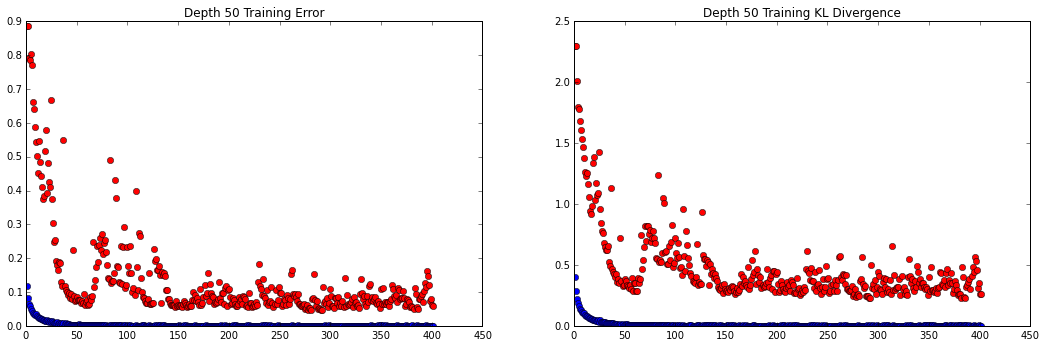

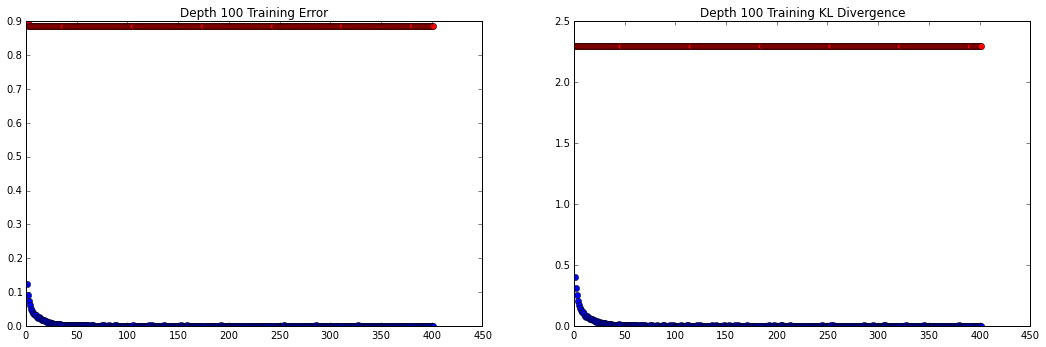

In [87]:
idx=0
for depth, vanilla, highway in data:
    vidx, vtraine, vtrainkl, vvalide, vvalidkl = npize(vanilla)
    hidx, htraine, htrainkl, hvalide, hvalidkl = npize(highway)
    fig = plt.figure()
    fig.set_size_inches(18,12,forward=True)
    q = fig.add_subplot(221)
    q.plot(vidx, vtraine, 'ro')
    q.plot(hidx, htraine, 'bo')
    q.set_title("Depth %d Training Error" % (depth))
    
    q = fig.add_subplot(222)
    q.plot(vidx, vtrainkl, 'ro')
    q.plot(hidx, htrainkl, 'bo')
    q.set_title("Depth %d Training KL Divergence" % (depth))
    idx += 1
    _ = fig.savefig("plots/highway-%d.png" % (depth))
    plt.show()
